# **Dataset goodbooks-10k dari Kaggle**

## Import Library

In [1]:
# Install Kaggle API untuk mengunduh dataset dari Kaggle
!pip install kaggle

*Mengimpor library yang dibutuhkan untuk analisis data dan pembuatan model rekomendasi*

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix, hstack

*Set Environment Variables untuk API Kaggle*

In [4]:
os.environ['KAGGLE_USERNAME'] = "evameivinadwiana"
os.environ['KAGGLE_KEY'] = "efbafcb258eb3a5f3033f21f925e06ef"

Menetapkan Kaggle API berupa username dan API key sebagai environment variables agar dapat mengakses dan mengunduh dataset dari Kaggle secara otomatis.

*Download Dataset dan Extract Dataset ZIP dari Kaggle*

In [5]:
# Download dataset goodbooks-10k dari Kaggle
!kaggle datasets download zygmunt/goodbooks-10k

# Extract file ZIP ke folder ./goodbooks10k (overwrite jika sudah ada)
!unzip -o goodbooks-10k.zip -d ./goodbooks10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 975MB/s]
Archive:  goodbooks-10k.zip
  inflating: ./goodbooks10k/book_tags.csv  
  inflating: ./goodbooks10k/books.csv  
  inflating: ./goodbooks10k/ratings.csv  
  inflating: ./goodbooks10k/sample_book.xml  
  inflating: ./goodbooks10k/tags.csv  
  inflating: ./goodbooks10k/to_read.csv  


# **Data Understanding**


### **Memuat Dataset**

Memuat beberapa file CSV dari dataset Goodbooks-10k yang sudah diunduh dan diekstrak

In [9]:
# Load dataset goodbooks-10k
books = pd.read_csv('./goodbooks10k/books.csv')
book_tags = pd.read_csv('./goodbooks10k/book_tags.csv')
ratings = pd.read_csv('./goodbooks10k/ratings.csv')
tags = pd.read_csv('./goodbooks10k/tags.csv')
to_read = pd.read_csv('./goodbooks10k/to_read.csv')

### **Memastikan Struktur Data**

Memeriksa nama kolom di *book_tags* untuk memastikan struktur data sudah benar:

In [54]:
# Tampilkan kolom dari book_tags untuk memastikan nama kolom yang benar
print(book_tags.columns)

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')


### **Statistik Ringkas Dataset**

Menampilkan jumlah data untuk setiap dataset utama

In [55]:
# Informasi ringkas jumlah data di setiap dataset
print('Jumlah buku:', len(books))
print('Jumlah tag buku:', len(book_tags['goodreads_book_id'].unique())) # Assuming 'goodreads_book_id' is the correct column name based on common Kaggle datasets. Adjust if necessary.
print('Jumlah penilaian pengguna:', len(ratings))
print('Jumlah pengguna yang memberikan rating:', len(ratings.user_id.unique()))
print('Jumlah tag yang tersedia:', len(tags))
print('Jumlah daftar buku yang akan dibaca:', len(to_read))

Jumlah buku: 10000
Jumlah tag buku: 10000
Jumlah penilaian pengguna: 981756
Jumlah pengguna yang memberikan rating: 53424
Jumlah tag yang tersedia: 34252
Jumlah daftar buku yang akan dibaca: 912705


Melihat 5 baris pertama dari setiap dataset untuk mendapatkan gambaran isi data

In [52]:
print(books.head())
print(book_tags.head())
print(ratings.head())
print(tags.head())
print(to_read.head())

   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Ph

Memeriksa apakah ada data yang kosong di setiap dataset untuk memastikan data bersih dan siap diproses

In [53]:
print(books.isnull().sum())
print(book_tags.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year       0
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
book_id    0
user_id    0
rating     0
dtype: int64
tag_id      0
tag_name    0
dtype: int64
user_id    0
book_id    0
dtyp

## **Univariate Exploratory Data Analysis**

**Dataset Overview**

In [56]:
print("Dataset Dimensions:")
print(f"Ratings: {ratings.shape}")
print(f"Books: {books.shape}")

Dataset Dimensions:
Ratings: (981756, 3)
Books: (10000, 23)


**Eksplorasi Dataset**

In [59]:
print("\n[Dataset: BOOKS]")
print("-" * 50)

# Menampilkan struktur data dan tipe tiap kolom
print("Struktur dan Tipe Data:")
books_structure = books.info()

# Menampilkan 5 data teratas sebagai sampel
print("\nContoh Data (5 baris pertama):")
print(books.head())

# Menampilkan ringkasan statistik numerik
print("\nStatistik Deskriptif:")
print(books.describe())

# Menampilkan informasi nilai yang hilang (jika ada)
print("\nNilai yang Hilang:")
missing_data = books.isnull().sum()
missing_data = missing_data[missing_data > 0]
if not missing_data.empty:
    print(missing_data)
else:
    print("Tidak ditemukan nilai kosong pada dataset.")


[Dataset: BOOKS]
--------------------------------------------------
Struktur dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  10000 non-null  float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_ra

In [60]:
print("\n[Analisis Dataset: BOOK_TAGS]")
print("-" * 50)

# Menampilkan informasi struktur dataset
print("Detail Struktur Dataset:")
book_tags_structure = book_tags.info()

# Menampilkan beberapa data awal sebagai representasi
print("\nCuplikan Awal Data:")
print(book_tags.head())

# Menampilkan ringkasan statistik numerik
print("\nRingkasan Statistik:")
print(book_tags.describe())

# Menampilkan informasi nilai kosong (jika ada)
print("\nCek Data Kosong:")
missing_entries = book_tags.isnull().sum()
null_summary = missing_entries[missing_entries > 0]
if not null_summary.empty:
    print(null_summary)
else:
    print("Seluruh kolom telah terisi dengan lengkap.")


[Analisis Dataset: BOOK_TAGS]
--------------------------------------------------
Detail Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB

Cuplikan Awal Data:
   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716

Ringkasan Statistik:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00

In [61]:
print("\n[Eksplorasi Awal: DATASET RATINGS]")
print("-" * 50)

# Menampilkan struktur data dan tipe setiap kolom
print("Struktur Kolom dan Tipe Data:")
ratings.info()

# Menampilkan lima baris pertama dari dataset
print("\nContoh Data:")
print(ratings.head())

# Menyajikan statistik ringkasan untuk kolom numerik
print("\nStatistik Umum:")
print(ratings.describe())

# Mengecek apakah ada data yang hilang
print("\nPemeriksaan Nilai Kosong:")
missing_data = ratings.isnull().sum()
missing_filtered = missing_data[missing_data > 0]
if not missing_filtered.empty:
    print(missing_filtered)
else:
    print("Tidak ditemukan nilai kosong dalam dataset.")


[Eksplorasi Awal: DATASET RATINGS]
--------------------------------------------------
Struktur Kolom dan Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB

Contoh Data:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4

Statistik Umum:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.

In [62]:
print("\n[Analisis Dataset: TAGS]")
print("-" * 50)

# Menampilkan struktur kolom dan tipe datanya
print("Detail Struktur Data:")
tags.info()

# Menampilkan data contoh awal
print("\nCuplikan Data:")
print(tags.head())

# Menampilkan ringkasan statistik numerik
print("\nRingkasan Statistik:")
print(tags.describe())

# Menampilkan kolom yang memiliki nilai kosong
print("\nCek Data Kosong:")
missing_info = tags.isnull().sum()
missing_found = missing_info[missing_info > 0]
if not missing_found.empty:
    print(missing_found)
else:
    print("Semua kolom telah terisi dengan baik.")


[Analisis Dataset: TAGS]
--------------------------------------------------
Detail Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Cuplikan Data:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-

Ringkasan Statistik:
             tag_id
count  34252.000000
mean   17125.500000
std     9887.845047
min        0.000000
25%     8562.750000
50%    17125.500000
75%    25688.250000
max    34251.000000

Cek Data Kosong:
Semua kolom telah terisi dengan baik.


In [63]:
print("\n[Review Dataset: TO_READ]")
print("-" * 40)

# Menampilkan info struktur dataset
print("Detail Informasi Dataset:")
to_read.info()

# Menampilkan beberapa baris data pertama
print("\nData Sampel:")
print(to_read.head())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Ringkas:")
print(to_read.describe())

# Mengecek dan menampilkan kolom yang mengandung nilai kosong
print("\nPemeriksaan Data Kosong:")
missing_entries = to_read.isnull().sum()
missing_cols = missing_entries[missing_entries > 0]
if not missing_cols.empty:
    print(missing_cols)
else:
    print("Tidak ditemukan nilai kosong pada dataset ini.")


[Review Dataset: TO_READ]
----------------------------------------
Detail Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB

Data Sampel:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874

Statistik Ringkas:
             user_id        book_id
count  912705.000000  912705.000000
mean    27668.980115    2454.739538
std     14775.096388    2626.359921
min         1.000000       1.000000
25%     15507.000000     360.000000
50%     27799.000000    1381.000000
75%     40220.000000    3843.000000
max     53424.000000   10000.000000

Pemeriksaan Data Kosong:
Tidak ditemukan nilai kosong pada dataset ini.


*Memvisualisasikan 10 penulis dengan jumlah buku terbanyak pada dataset books.*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Stephen King'),
  Text(1, 0, 'Nora Roberts'),
  Text(2, 0, 'Dean Koontz'),
  Text(3, 0, 'Terry Pratchett'),
  Text(4, 0, 'Agatha Christie'),
  Text(5, 0, 'Meg Cabot'),
  Text(6, 0, 'James Patterson'),
  Text(7, 0, 'David Baldacci'),
  Text(8, 0, 'John Grisham'),
  Text(9, 0, 'J.D. Robb')])

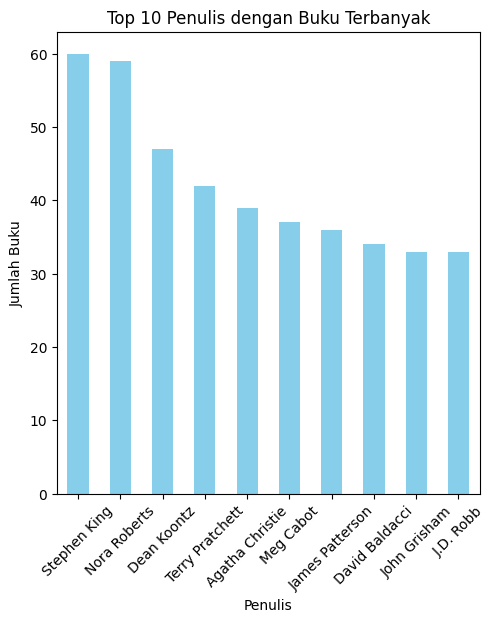

In [19]:
plt.style.use('default')
sns.set_palette("husl")
fig_size = (12, 6)
plt.figure(figsize=fig_size)

top_authors = books['authors'].value_counts().head(10)

plt.subplot(1, 2, 1)
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Penulis dengan Buku Terbanyak')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Buku')
plt.xticks(rotation=45)

Dari diagram batang yang dihasilkan, terlihat bahwa Stephen King menempati posisi teratas sebagai penulis dengan jumlah buku terbanyak dalam dataset ini. Posisi kedua diduduki oleh Nora Roberts, diikuti oleh Dean Koontz yang berada di peringkat ketiga. Ketiga penulis ini menjadi yang paling dominan, mencerminkan kontribusi mereka yang signifikan terhadap koleksi buku yang tercatat dalam dataset.

*Menampilkan 10 buku dengan rating rata-rata tertinggi dari dataset*

<ipython-input-20-642cb17680bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='average_rating', y='title', palette='husl')


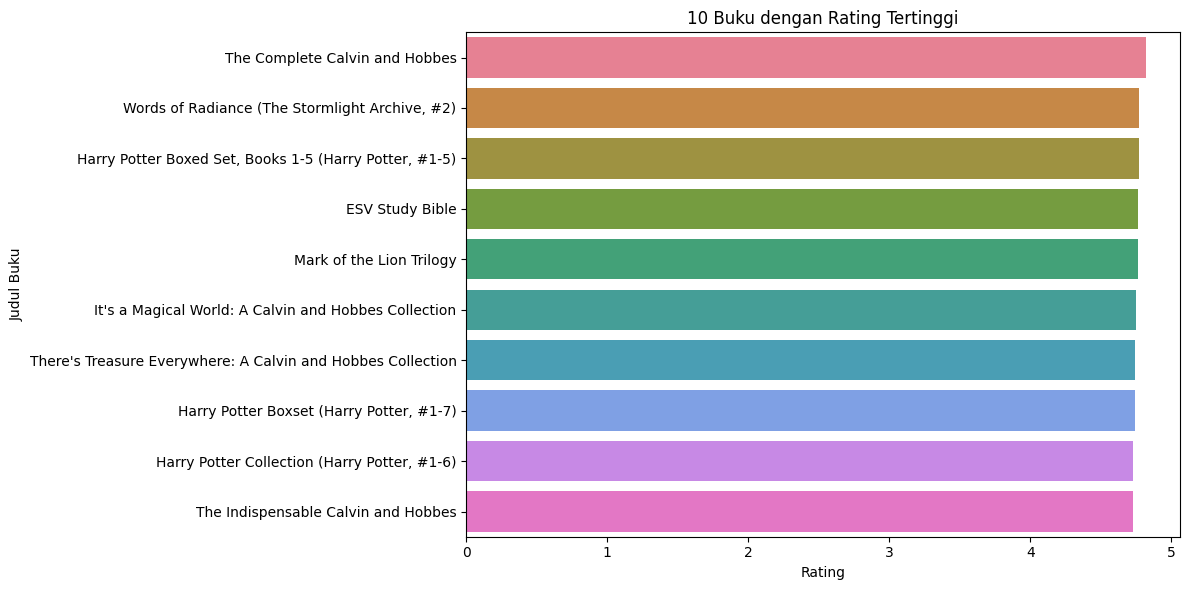

In [20]:
top_rated = books.sort_values(by='average_rating', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated, x='average_rating', y='title', palette='husl')
plt.title('10 Buku dengan Rating Tertinggi')
plt.xlabel('Rating')
plt.ylabel('Judul Buku')
plt.tight_layout()
plt.show()

Buku-buku tersebut diurutkan berdasarkan nilai *average_rating* secara menurun, sehingga buku dengan rating tertinggi muncul di bagian paling atas grafik. Dari visualisasi ini, buku dengan rating tertinggi adalah The Complete Calvin and Hobbes, yang menduduki posisi pertama.

*Menggabungkan dua dataset, yaitu book_tags dan tags, berdasarkan kolom tag_id menggunakan fungsi pd.merge()*

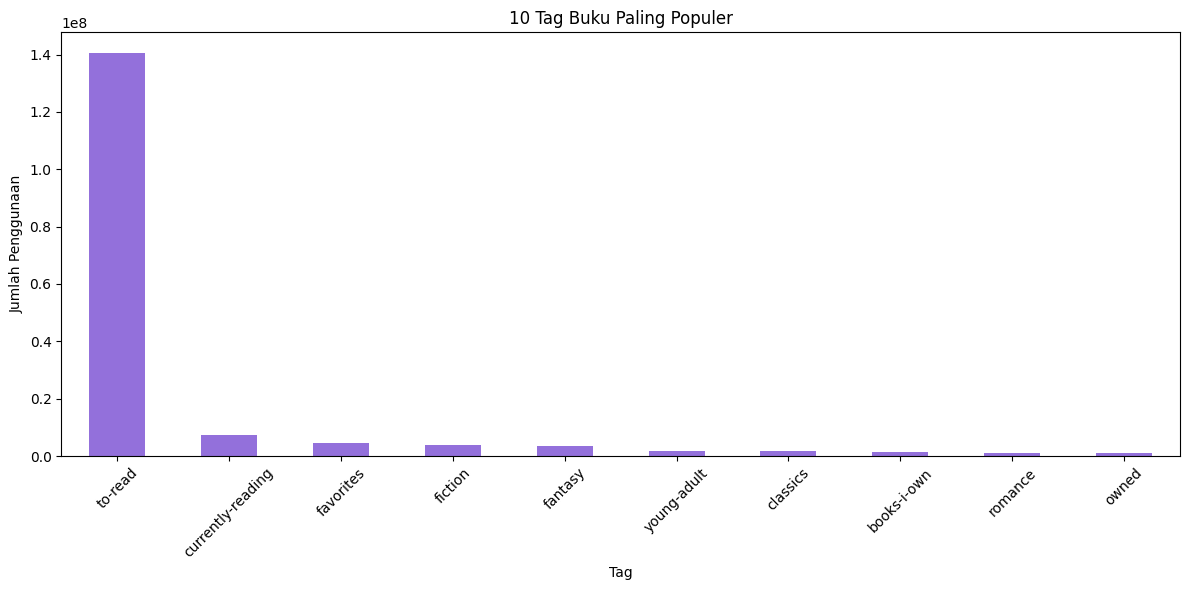

In [21]:
merged_tags = pd.merge(book_tags, tags, on='tag_id')
top_tags = merged_tags.groupby('tag_name')['count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='mediumpurple')
plt.title('10 Tag Buku Paling Populer')
plt.xlabel('Tag')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari diagram batang tersebut, terlihat 10 tag buku paling populer berdasarkan frekuensi penggunaannya dalam dataset. Tag dengan jumlah penggunaan tertinggi adalah "to-read", yang menunjukkan bahwa banyak buku diberi label ini sebagai daftar bacaan yang ingin dibaca oleh pengguna.

*Distribusi Rating Pengguna*


<ipython-input-22-1f8bbca5b772>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette='husl')


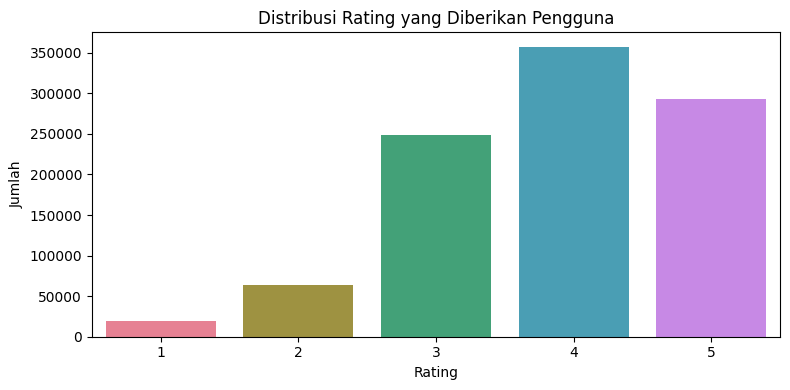

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=ratings, x='rating', palette='husl')
plt.title('Distribusi Rating yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Dari diagram distribusi rating ini, dapat dilihat bahwa rating dengan frekuensi tertinggi adalah rating 4. Artinya, mayoritas pengguna memberikan penilaian 4 pada buku-buku dalam dataset, menunjukkan bahwa secara umum buku-buku tersebut mendapat respon positif dengan rating yang cenderung tinggi.

*Menampilkan 10 buku yang paling sering dimasukkan ke dalam daftar "To-Read" oleh pengguna*

<ipython-input-23-e1d6e5969e4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_to_read_books, x='to_read_count', y='title', palette='Blues_d')


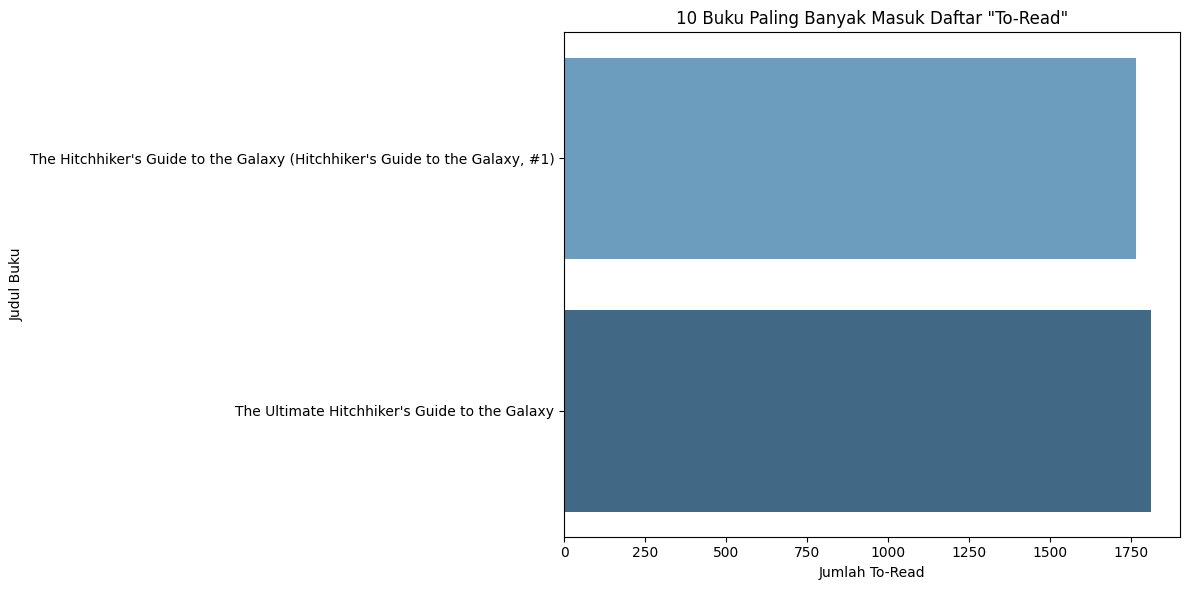

In [23]:
to_read_count = to_read['book_id'].value_counts().head(10)
top_to_read_books = books[books['book_id'].isin(to_read_count.index)][['book_id', 'title']]
top_to_read_books['to_read_count'] = top_to_read_books['book_id'].map(to_read_count)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_to_read_books, x='to_read_count', y='title', palette='Blues_d')
plt.title('10 Buku Paling Banyak Masuk Daftar "To-Read"')
plt.xlabel('Jumlah To-Read')
plt.ylabel('Judul Buku')
plt.tight_layout()
plt.show()

Diagram batang ini menampilkan 10 buku yang paling sering dimasukkan ke dalam daftar *To-Read* oleh pengguna. Buku-buku tersebut diurutkan berdasarkan frekuensi kemunculannya dalam daftar tersebut, dengan buku *The Hitchhiker's Guide to the Galaxy* menempati posisi teratas sebagai buku yang paling banyak dimasukkan.

*Analisis Kualitas Data pada Dataset Buku*


In [26]:
datasets = {
    "Books": books,
    "Book Tags": book_tags,
    "Ratings": ratings,
    "Tags": tags,
    "To Read": to_read
}

def assess_data_quality(df, name):
    print(f"\n{name}:")

    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    missing_percent = (missing_cells / total_cells) * 100

    duplicate_rows = df.duplicated().sum()

    print(f"- Total Records     : {df.shape[0]}")
    print(f"- Total Columns     : {df.shape[1]}")
    print(f"- Missing Values    : {missing_cells}/{total_cells} ({missing_percent:.2f}%)")
    print(f"- Duplicate Rows    : {duplicate_rows}")

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"- Numeric Columns   : {len(numeric_cols)}")
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()
            if outliers > 0:
                print(f"  - {col}: {outliers} potential outliers")

for name, df in datasets.items():
    assess_data_quality(df, name)


Books:
- Total Records     : 10000
- Total Columns     : 23
- Missing Values    : 2975/230000 (1.29%)
- Duplicate Rows    : 0
- Numeric Columns   : 16
  - book_id: 345 potential outliers
  - best_book_id: 357 potential outliers
  - work_id: 601 potential outliers
  - books_count: 844 potential outliers
  - isbn13: 556 potential outliers
  - original_publication_year: 1031 potential outliers
  - average_rating: 158 potential outliers
  - ratings_count: 1163 potential outliers
  - work_ratings_count: 1143 potential outliers
  - work_text_reviews_count: 1005 potential outliers
  - ratings_1: 1140 potential outliers
  - ratings_2: 1156 potential outliers
  - ratings_3: 1149 potential outliers
  - ratings_4: 1131 potential outliers
  - ratings_5: 1158 potential outliers

Book Tags:
- Total Records     : 999912
- Total Columns     : 3
- Missing Values    : 0/2999736 (0.00%)
- Duplicate Rows    : 6
- Numeric Columns   : 3
  - goodreads_book_id: 34500 potential outliers
  - count: 131269 pote

# **Data Preparation**

Dilakukan pembersihan data dengan mengisi nilai kosong pada  *original_publication_year* menggunakan rata-rata dan *language_code* menggunakan modus. Kolom *isbn* dan *isbn13* yang banyak missing dihapus, serta data duplikat dihapus.

*Fitur authors* dan *language_code* diubah menjadi angka dengan *LabelEncoder*, dan fitur numerik dinormalisasi dengan *MinMaxScaler*.

Fitur numerik digabungkan dengan representasi *TF-IDF* dari judul buku untuk membentuk matriks fitur gabungan.

Matriks ini digunakan untuk menghitung *similarity matrix* berbasis cosine similarity guna analisis dan rekomendasi buku.

In [27]:
print(f"- books null:\n{books.isnull().sum()}")
print(f"- ratings null:\n{ratings.isnull().sum()}")

- books null:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
- ratings null:
book_id    0
user_id    0
rating     0
dtype: int64


In [28]:
books['original_publication_year'] = books['original_publication_year'].fillna(books['original_publication_year'].mean())

In [29]:
books_clean = books.drop(columns=['isbn', 'isbn13'])

In [30]:
books_clean = books_clean.drop_duplicates()
ratings_clean = ratings.drop_duplicates()

In [35]:
books_clean['language_code'] = books_clean['language_code'].fillna(books_clean['language_code'].mode()[0])

In [36]:
le_author = LabelEncoder()
le_language = LabelEncoder()

books_clean['author_encoded'] = le_author.fit_transform(books_clean['authors'])
books_clean['language_encoded'] = le_language.fit_transform(books_clean['language_code'])

In [37]:
scaler = MinMaxScaler()
numerical_cols = ['average_rating', 'ratings_count', 'original_publication_year']
books_clean[numerical_cols] = scaler.fit_transform(books_clean[numerical_cols])

In [38]:
content_features_num = books_clean[
    ['average_rating', 'ratings_count', 'original_publication_year', 'author_encoded', 'language_encoded']
]

In [42]:
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
title_tfidf = tfidf.fit_transform(books_clean['title'].fillna(''))

In [43]:
numerical_sparse = csr_matrix(content_features_num.values)
feature_matrix = hstack([numerical_sparse, title_tfidf])

print(f"Content feature matrix shape: {feature_matrix.shape}")

Content feature matrix shape: (10000, 505)


In [46]:
print("Computing cosine similarity matrix...")
similarity_matrix = cosine_similarity(feature_matrix, dense_output=False)  # buat memory efisien
print(f"Similarity matrix shape: {similarity_matrix.shape}")

Computing cosine similarity matrix...
Similarity matrix shape: (10000, 10000)


# Modelling & Results

### Content Base Filtering

Mencari dan menampilkan rekomendasi buku mirip berdasarkan judul buku input menggunakan metode content-based filtering dengan matriks kemiripan.

In [76]:
# Fungsi untuk mendapatkan rekomendasi buku berdasarkan judul buku menggunakan content-based filtering
def get_book_recommendations(book_title, n=5, show=True):
    try:
        # Cek apakah kolom 'title' ada di dataframe
        if 'title' not in books_clean.columns:
            print("Kolom 'title' tidak ditemukan.")
            return None

        # Cari indeks buku yang judulnya sama dengan book_title
        idx_list = books_clean.index[books_clean['title'] == book_title].tolist()
        if not idx_list:
            print(f"'{book_title}' tidak ditemukan.")
            return None
        idx = idx_list[0]

        # Ambil skor kemiripan (similarity) dari matriks similarity untuk buku tersebut
        sim_scores = similarity_matrix[idx].toarray().flatten()
        sim_scores = list(enumerate(sim_scores))

        # Urutkan skor kemiripan secara descending dan ambil n teratas selain buku itu sendiri
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = [x for x in sim_scores if x[0] != idx][:n]

        # Ambil indeks buku-buku yang direkomendasikan
        top_idx = [i for i, _ in sim_scores]

        # Ambil data buku rekomendasi berdasarkan indeks, termasuk judul dan penulis
        recommendations = books_clean.loc[top_idx, ['title', 'authors']].copy()
        # Tambahkan kolom skor kemiripan ke dataframe rekomendasi
        recommendations['Similarity_Score'] = [s for _, s in sim_scores]

        # Jika kolom lain ada di dataset, tambahkan juga ke rekomendasi
        for col in ['average_rating', 'ratings_count', 'original_publication_year']:
            if col in books_clean.columns:
                recommendations[col] = books_clean.loc[top_idx, col].values

        # Jika parameter show True, tampilkan hasil rekomendasi secara rapi
        if show:
            print(f"\nCONTENT-BASED RECOMMENDATIONS FOR BOOK: '{book_title}'")
            print("=" * 70)
            for i, (_, row) in enumerate(recommendations.iterrows(), 1):
                print(f"{i}. {row['title']} by {row['authors']} (Similarity: {row['Similarity_Score']:.3f})")
                if 'average_rating' in row:
                    print(f"   Average Rating: {row['average_rating']:.2f}")
                if 'ratings_count' in row:
                    print(f"   Ratings Count: {row['ratings_count']}")
                if 'original_publication_year' in row:
                    print(f"   Publication Year: {int(row['original_publication_year'])}")
                print("-" * 50)

        # Kembalikan dataframe rekomendasi
        return recommendations

    except Exception as e:
        # Tangani error dengan mencetak pesan error dan kembalikan None
        print(f"Error: {e}")
        return None

Menampilkan 10 judul buku secara acak dari dataframe books_clean dan menampilkannya dalam bentuk array.

In [71]:
print(books_clean['title'].sample(10, random_state=42).values)

['Scion of Ikshvaku (RamChandra, #1)' 'Canada' 'The Man in the Brown Suit'
 'Twilight and Philosophy: Vampires, Vegetarians, and the Pursuit of Immortality'
 'Saga, Vol. 5 (Saga, #5)' 'Asterix the Gaul (Asterix, #1)'
 'Tuck Everlasting' 'Domes of Fire (The Tamuli, #1)'
 'When We Were Orphans' 'Fall of Giants (The Century Trilogy, #1)']


Memeriksa keberadaan sebuah judul buku dalam data, menampilkan ukuran matriks kemiripan yang digunakan, lalu memberikan dan menampilkan 5 rekomendasi buku yang paling mirip berdasarkan skor kemiripan, lengkap dengan detail seperti pengarang, rating, jumlah rating, dan tahun terbit jika tersedia.

In [73]:
judul_cari = 'Scion of Ikshvaku (RamChandra, #1)'
print(f"Ada judul '{judul_cari}' di data?", judul_cari in books_clean['title'].values)

print("Shape similarity_matrix:", similarity_matrix.shape)

idx = books_clean.index[books_clean['title'] == judul_cari][0]
print("Tipe similarity_matrix[idx]:", type(similarity_matrix[idx]))

get_book_recommendations(judul_cari, n=5, show=True)

Ada judul 'Scion of Ikshvaku (RamChandra, #1)' di data? True
Shape similarity_matrix: (10000, 10000)
Tipe similarity_matrix[idx]: <class 'scipy.sparse._csr.csr_matrix'>

CONTENT-BASED RECOMMENDATIONS FOR BOOK: 'Scion of Ikshvaku (RamChandra, #1)'
1. The Hungry Tide by Amitav Ghosh (Similarity: 1.000)
   Average Rating: 0.61
   Ratings Count: 0.001466323226949204
   Publication Year: 0
--------------------------------------------------
2. The Virgin Cure by Ami McKay (Similarity: 1.000)
   Average Rating: 0.54
   Ratings Count: 0.001448114531438987
   Publication Year: 0
--------------------------------------------------
3. Inescapable (The Premonition, #1) by Amy A. Bartol (Similarity: 1.000)
   Average Rating: 0.67
   Ratings Count: 0.004664146890174567
   Publication Year: 0
--------------------------------------------------
4. Samarkand by Amin Maalouf, Russell Harris (Similarity: 1.000)
   Average Rating: 0.74
   Ratings Count: 0.0010221984927804616
   Publication Year: 0
---------

,title,authors,Similarity_Score,average_rating,ratings_count,original_publication_year
8014,The Hungry Tide,Amitav Ghosh,1.000000,0.612766,0.001466,0.996549
9969,The Virgin Cure,Ami McKay,0.999999,0.540426,0.001448,0.998407
5222,"Inescapable (The Premonition, #1)",Amy A. Bartol,0.999999,0.672340,0.004664,0.998938
7326,Samarkand,"Amin Maalouf, Russell Harris",0.999999,0.736170,0.001022,0.992302
8410,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,0.999999,0.595745,0.001548,0.982745


Mengukur seberapa baik sistem rekomendasi content-based dalam memberikan rekomendasi yang relevan berdasarkan penulis buku. Dengan mengambil sampel acak dari data buku, fungsi ini menghasilkan rekomendasi untuk setiap buku sampel dan menghitung Precision@k, yaitu proporsi rekomendasi yang memiliki penulis sama dengan buku yang dicari. Hasil evaluasi berupa rata-rata Precision@k dari seluruh sampel, yang menunjukkan tingkat akurasi sistem rekomendasi pada data tersebut.

In [74]:
def evaluate_content_based_precision_at_k(k=5, sample_size=30):
    print(f"Evaluating Content-Based Filtering dengan Precision@{k}")

    if 'books_clean' not in globals():
        print("Dataframe 'books_clean' tidak ditemukan.")
        return None

    current_sample_size = min(sample_size, len(books_clean))
    if current_sample_size == 0:
        print("Tidak ada buku untuk dievaluasi.")
        return None

    sample_books = books_clean.sample(current_sample_size, random_state=42)
    precisions = []

    for _, book_row in sample_books.iterrows():
        book_title = book_row['title']
        book_author = book_row['authors']

        recommendations = get_book_recommendations(book_title, n=k, show=False)
        if recommendations is not None and not recommendations.empty:

            relevant_items = sum(recommendations['authors'] == book_author)
            precision = relevant_items / k
            precisions.append(precision)

    if precisions:
        avg_precision = np.mean(precisions)
        print(f"Average Precision@{k}: {avg_precision:.4f}")
        print(f"Evaluated on {len(precisions)} samples")
        print(f"Precision range: {min(precisions):.4f} - {max(precisions):.4f}")
        return avg_precision
    else:
        print("Could not evaluate Precision@K")
        return None

# EVALUATION


Untuk evaluasi pada bagian content-based dengan menggunakan Metrik Precision@

In [77]:
cbf_precision = evaluate_content_based_precision_at_k(k=5, sample_size=30)
print(f"Precision@5 dari content-based filtering: {cbf_precision}")

Evaluating Content-Based Filtering dengan Precision@5
Average Precision@5: 0.2333
Evaluated on 30 samples
Precision range: 0.0000 - 1.0000
Precision@5 dari content-based filtering: 0.23333333333333334
